In [33]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely import wkt
import seaborn as sns
import contextily as ctx
import rioxarray as rxr
import xarray as xr
import seaborn as sns

In [3]:
# If using Google Colab, mount Google Drive so you can access the files in this folder
# from google.colab import drive
# drive.mount('/content/drive')

In [8]:
# -----Load site names with snowline estimates
# path to study-sites/
study_sites_path = '/Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/study-sites/'

# path to save output figures
figures_out_path = 'drive/MyDrive/Research/PhD/snow_cover_mapping/snow_cover_mapping_application/figures/'

# Grab list of all study site names in folder
os.chdir(study_sites_path)
site_names = sorted([x[0:-1] for x in glob.glob('*/', recursive = True)])

# Filter sites for those with snowline files
site_names = sorted([x for x in site_names if len(glob.glob(study_sites_path + x + '/imagery/snowlines/*.csv')) > 0])
print('Number of sites = ' + str(len(site_names)))
site_names

['Blue',
 'Boulder',
 'Carbon',
 'Coleman',
 'Easton',
 'Emmons',
 'Gulkana',
 'LemonCreek',
 'RGI60-01.00037',
 'RGI60-01.00038',
 'RGI60-01.00046',
 'RGI60-01.00312',
 'RGI60-01.00576',
 'RGI60-01.01151',
 'RGI60-01.01390',
 'RGI60-01.01524',
 'RGI60-01.01733',
 'RGI60-01.08246',
 'RGI60-01.08248',
 'RGI60-01.08288',
 'RGI60-01.08296',
 'RGI60-01.10778',
 'RGI60-01.10857',
 'RGI60-01.11616',
 'RGI60-01.11654',
 'RGI60-01.11788',
 'RGI60-01.12370',
 'RGI60-01.14523',
 'RGI60-01.16262',
 'RGI60-01.17464',
 'RGI60-01.19599',
 'RGI60-01.19790',
 'RGI60-01.20180',
 'RGI60-01.20181',
 'RGI60-01.20186',
 'RGI60-01.20196',
 'RGI60-01.20272',
 'RGI60-01.20274',
 'RGI60-01.20279',
 'RGI60-01.20286',
 'RGI60-01.20302',
 'RGI60-01.20303',
 'RGI60-01.20309',
 'RGI60-01.23597',
 'RGI60-01.26743',
 'RGI60-02.00556',
 'RGI60-02.01346',
 'RGI60-02.01843',
 'RGI60-02.02364',
 'RGI60-02.02606',
 'RGI60-02.03578',
 'RGI60-02.03586',
 'RGI60-02.03769',
 'RGI60-02.04305',
 'RGI60-02.04363',
 'RGI60-02.044

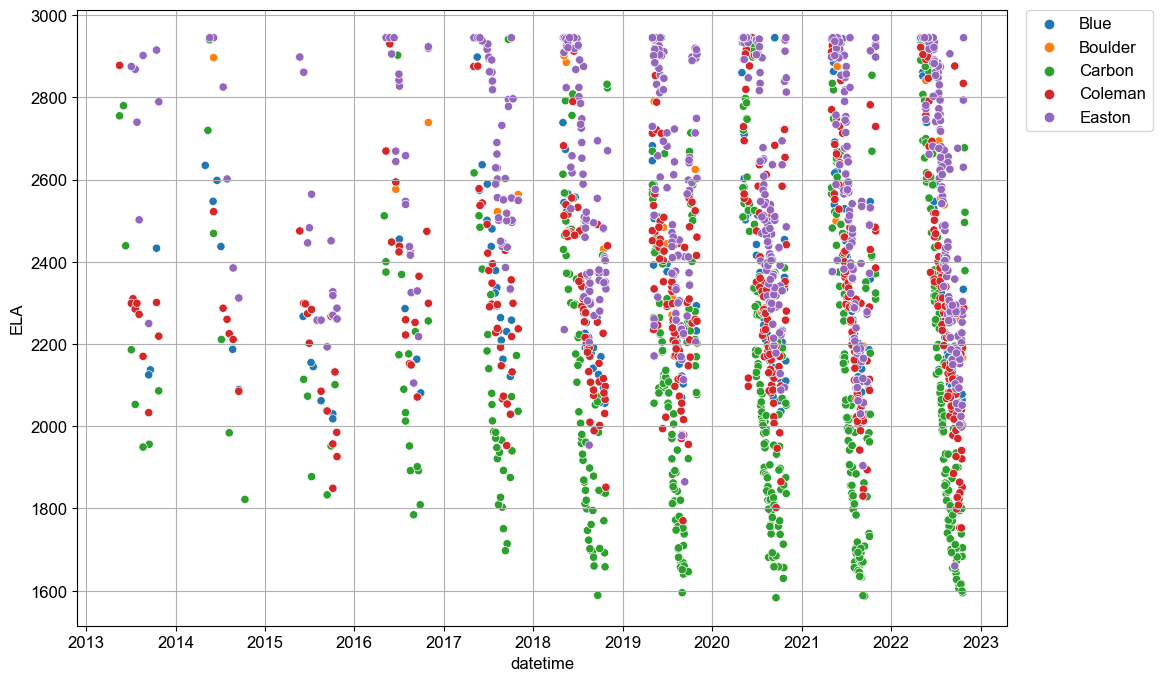

In [45]:
# -----Create empty dataframe for snowlines info
sl_ests = pd.DataFrame()

# -----Iterate over site names and estimate ELAs using AARs
for site_name in site_names[0:5]:
    
    # load one classified image to extract elevations
    im_classified_fn = glob.glob(study_sites_path + site_name + '/imagery/classified/*.nc')[0]
    im_classified = xr.open_dataset(im_classified_fn)
    im_classified = xr.where((im_classified > 1e10) | (im_classified == -9999), np.nan, im_classified)
    
    # load snowlines
    sl_est_fns = glob.glob(study_sites_path + site_name + '/imagery/snowlines/*.csv')
    # loop through snowlines to compile
    for sl_est_fn in sl_est_fns:
        try:
            sl_est = pd.read_csv(sl_est_fn)
            sl_ests = pd.concat([sl_ests, sl_est])
        except:
            continue
    # adjust dataframe
    sl_ests.reset_index(drop=True, inplace=True)
    sl_ests['datetime'] = pd.to_datetime(sl_ests['datetime'], format='mixed')
    
    # estimate ELA using the AAR and elevations
    elevations = np.ravel(im_classified.elevation.data[0])
    elevations = elevations[~np.isnan(elevations)]
    sl_ests['ELA'] = [np.quantile(elevations, aar) for aar in sl_ests['AAR']]
    
# -----Plot results
plt.rcParams.update({'font.size':12, 'font.sans-serif':'Arial'})
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.scatterplot(data=sl_ests, x='datetime', y='ELA', hue='site_name', ax=ax)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.grid()
plt.show()